# Model: Autoregressive Integrated Moving Average (ARIMA) Prediciton Model

#### A statistical analysis model that uses time series data to either better understand the data set or to predict trends. 
#### This model can be innacurate under certain market conditions, like financial crises or periods of rapid technoly change."


### Autoregressive: Predicts future values based on past values, or its own lagged values.

### Integrated: Put simply, trends and seasonality are removed from the data to make it "stationary". Ideally, this will ensure that the model captures the underlying behaviors accurately, leading to more reliable predicitons. 

### Moving Average: Uses past forecast errors rather than past real vlaues to forecast values.

In [109]:
import pandas as pd
import hvplot.pandas
import numpy as np
from pathlib import Path
from IPython.display import display

import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
ICE_USDCNY_1D = Path("Resources/ICE_USDCNY_1D.csv")

In [3]:
usdcny_1D = pd.read_csv(
    ICE_USDCNY_1D,
    index_col="time",
    infer_datetime_format=True,
    parse_dates=True,
)

/var/folders/jp/x_d0tm_j75v5bcxxbpv_nllh0000gp/T/ipykernel_82983/2405115755.py:1: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  usdcny_1D = pd.read_csv(


In [4]:
usdcny_1D = usdcny_1D.rename_axis("Date")

In [5]:
usdcny_1D = usdcny_1D.sort_index()
usdcny_1D = usdcny_1D[["close"]]

usdcny_1D.head(10)

,close
Date,
1981-01-02,1.5341
1981-01-05,1.5418
1981-01-06,1.5264
1981-01-07,1.5264
1981-01-08,1.5264
1981-01-09,1.5371
1981-01-12,1.5371
1981-01-13,1.5449
1981-01-14,1.5449


In [6]:
usdcny_1D.index

DatetimeIndex(['1981-01-02', '1981-01-05', '1981-01-06', '1981-01-07',
               '1981-01-08', '1981-01-09', '1981-01-12', '1981-01-13',
               '1981-01-14', '1981-01-15',
               ...
               '2024-03-01', '2024-03-04', '2024-03-05', '2024-03-06',
               '2024-03-07', '2024-03-08', '2024-03-11', '2024-03-12',
               '2024-03-13', '2024-03-14'],
              dtype='datetime64[ns]', name='Date', length=10919, freq=None)

In [7]:
usdcny_1D.tail(10)

,close
Date,
2024-03-01,7.1955
2024-03-04,7.1982
2024-03-05,7.1960
2024-03-06,7.1966
2024-03-07,7.1921
2024-03-08,7.1850
2024-03-11,7.1815
2024-03-12,7.1795
2024-03-13,7.1856


Text(0, 0.5, 'Rate')

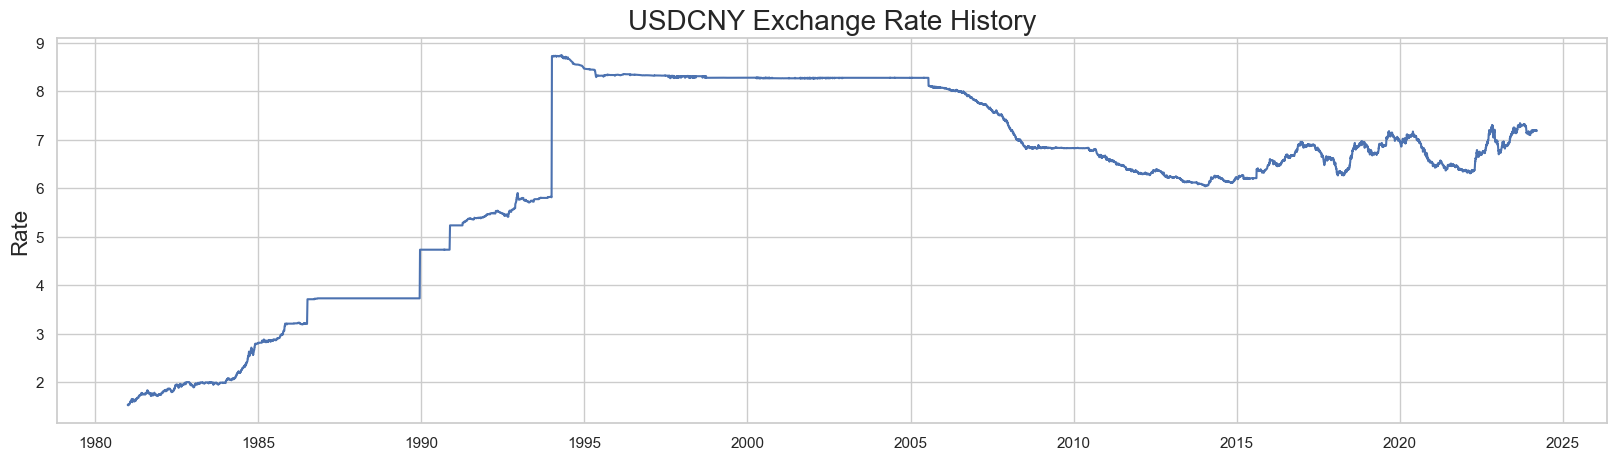

In [102]:
plt.figure(figsize=(20,5))
plt.plot(usdcny_1D)
plt.title("USDCNY Exchange Rate History", fontsize=20)
plt.ylabel('Rate', fontsize=16)

In [9]:
usdcny_1D.dtypes

close    float64
dtype: object

In [12]:
# Unpegged in July 2005, CNY becoming a free market currency
start_date = '2005-01-31'
end_date = '2024-03-14'

# Boolean indexing to select rows within the specified date range
usdcny_unpeg = usdcny_1D[(usdcny_1D.index >= start_date) & (usdcny_1D.index <= end_date)]
usdcny_unpeg

,close
Date,
2005-01-31,8.2767
2005-02-01,8.2760
2005-02-02,8.2767
2005-02-03,8.2767
2005-02-04,8.2767
...,...
2024-03-08,7.1850
2024-03-11,7.1815
2024-03-12,7.1795


Text(0, 0.5, 'Rate')

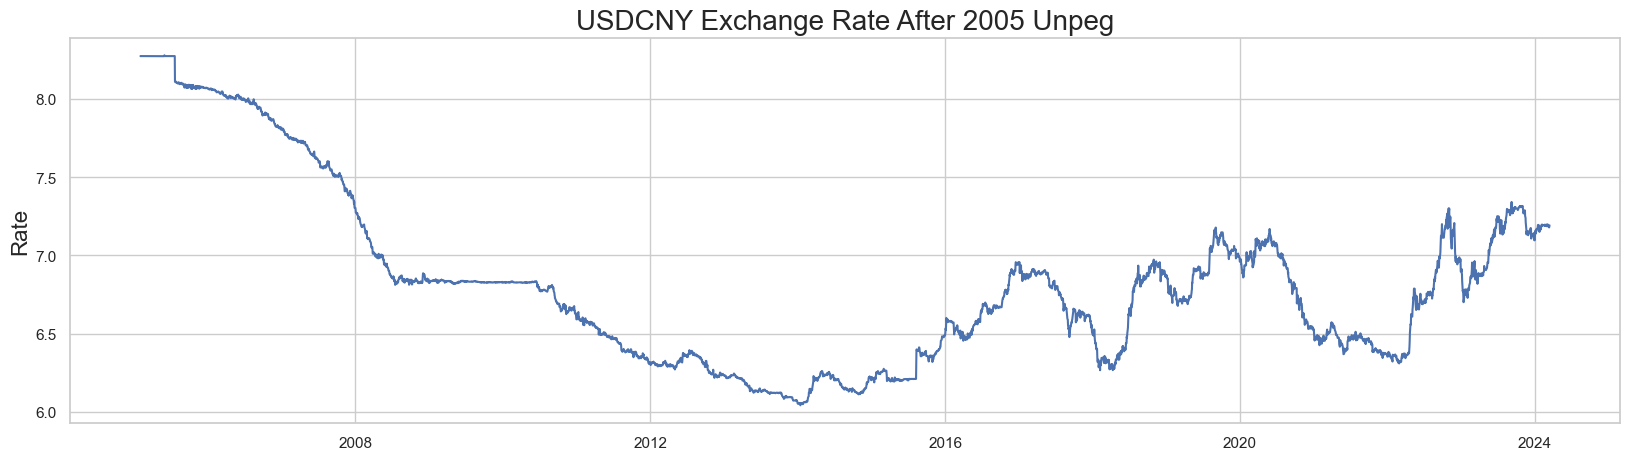

In [103]:
plt.figure(figsize=(20,5))
plt.plot(usdcny_unpeg)
plt.title("USDCNY Exchange Rate After 2005 Unpeg", fontsize=20)
plt.ylabel('Rate', fontsize=16)

In [14]:
# Post-financial crisis

start_date = '2010-01-01'
end_date = '2024-03-14'

# Boolean indexing to select rows within the specified date range
usdcny_post2010 = usdcny_1D[(usdcny_1D.index >= start_date) & (usdcny_1D.index <= end_date)]
usdcny_post2010

,close
Date,
2010-01-01,6.8269
2010-01-04,6.8278
2010-01-05,6.8268
2010-01-06,6.8276
2010-01-07,6.8278
...,...
2024-03-08,7.1850
2024-03-11,7.1815
2024-03-12,7.1795


Text(0, 0.5, 'Rate')

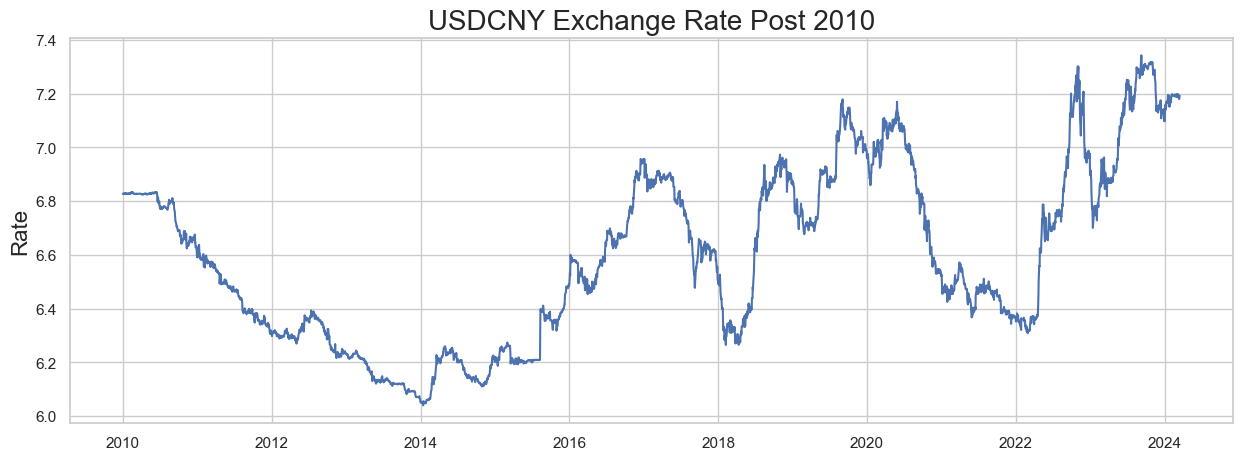

In [106]:
plt.figure(figsize=(15,5))
plt.plot(usdcny_post2010)
plt.title("USDCNY Exchange Rate Post 2010", fontsize=20)
plt.ylabel('Rate', fontsize=16)

In [16]:
# Post-currency devaluation August 2015

start_date = '2015-08-01'
end_date = '2024-03-14'

# Boolean indexing to select rows within the specified date range
usdcny_post2015 = usdcny_1D[(usdcny_1D.index >= start_date) & (usdcny_1D.index <= end_date)]
usdcny_post2015

,close
Date,
2015-08-03,6.2087
2015-08-04,6.2085
2015-08-05,6.2095
2015-08-06,6.2095
2015-08-07,6.2085
...,...
2024-03-08,7.1850
2024-03-11,7.1815
2024-03-12,7.1795


### We'll use data after 2015 to train our model (less noise)

Text(0, 0.5, 'Rate')

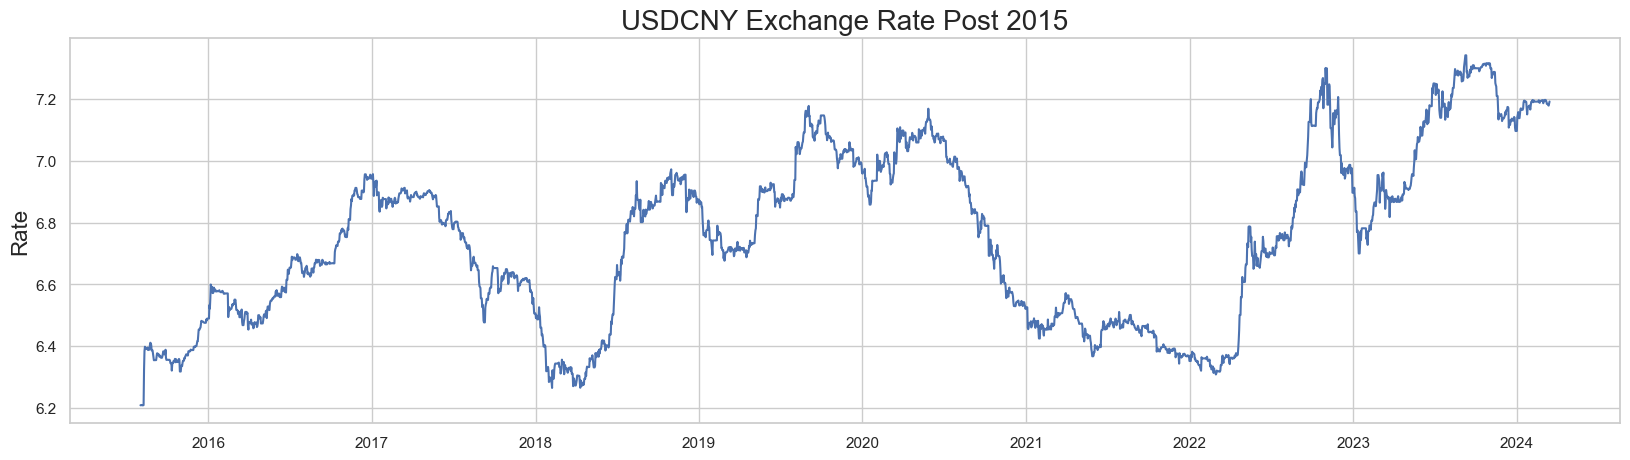

In [110]:
# Artificially devalued CNY currency
plt.figure(figsize=(20,5))
plt.plot(usdcny_post2015)
plt.title("USDCNY Exchange Rate Post 2015", fontsize=20)
plt.ylabel('Rate', fontsize=16)

### Importing libraries for ARIMA, SARIMA, and data analysis

In [81]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from time import time
import seaborn as sns
sns.set(style="whitegrid")

RANDOM_SEED = np.random.seed(0)

### Web-sourced function to check for stationarity

In [83]:
def check_stationarity(ts):
    dftest = adfuller(ts)
    adf = dftest[0]
    pvalue = dftest[1]
    critical_value = dftest[4]['5%']
    if (pvalue < 0.05) and (adf < critical_value):
        print('The series is stationary')
    else:
        print('The series is NOT stationary')

### After the Seasonal-Trend Decomposition, notice the apparent yearly-seasonal behavior

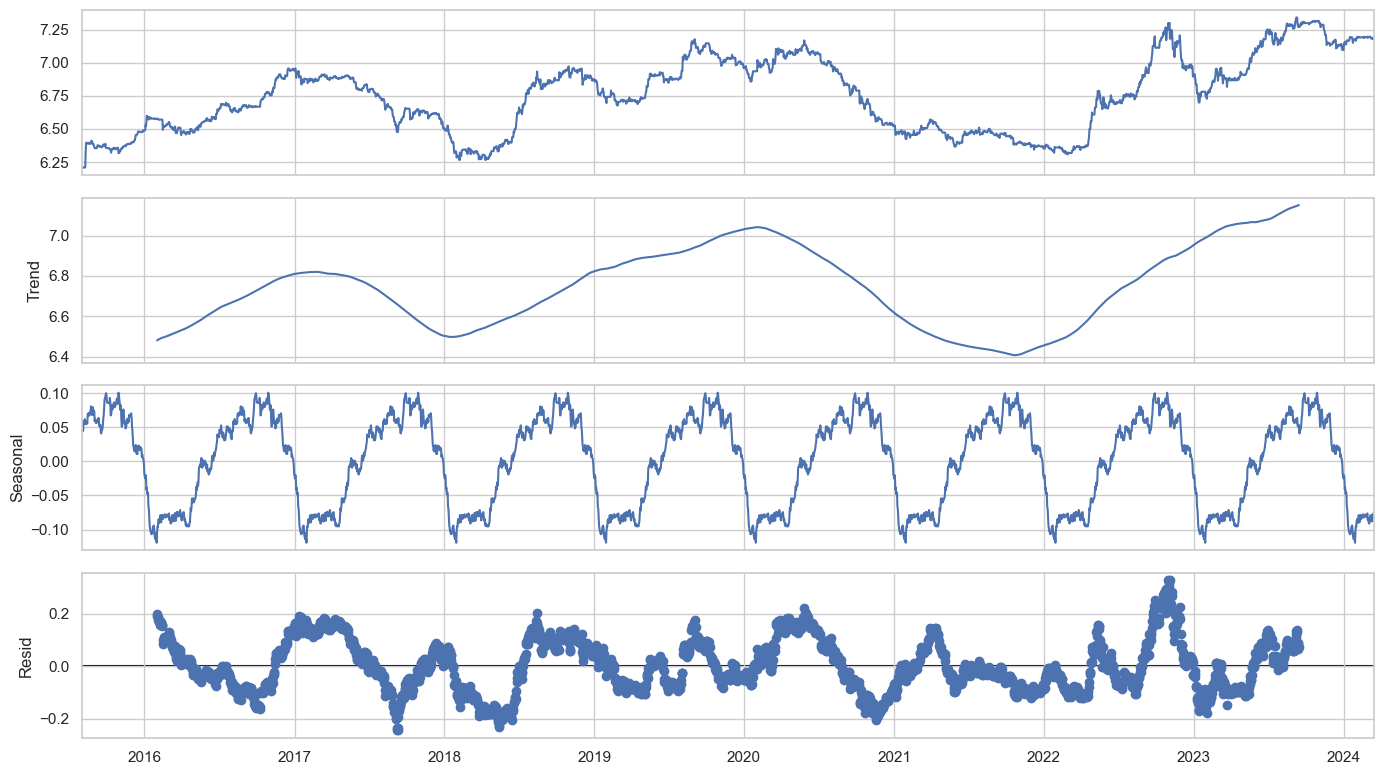

In [84]:
# STL(Seasonal-Trend) Decomposition
plt.rc('figure',figsize=(14,8))
plt.rc('font',size=15)

result = seasonal_decompose(usdcny_post2015, model='additive', period = 365)
fig = result.plot()

In [85]:
check_stationarity(usdcny_post2015)

The series is NOT stationary


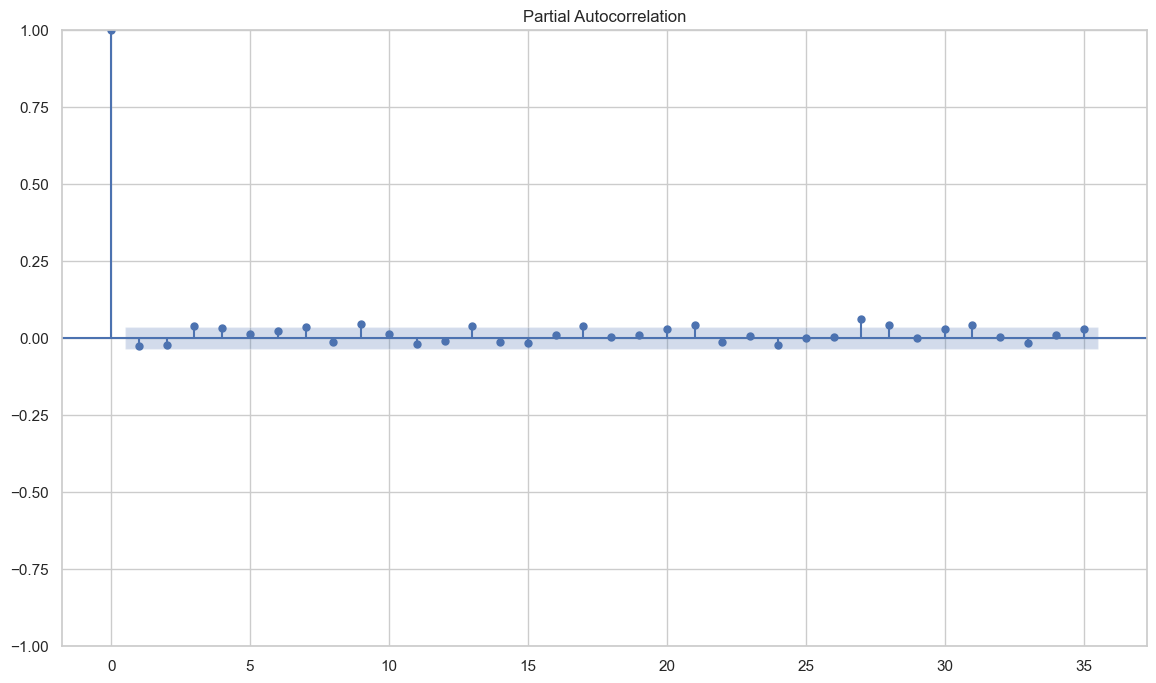

In [86]:
# Finding p
plot_pacf(usdcny_post2015.diff().dropna());

# p value is either 3-1=2 or 4-1=3

In [87]:
# Finding d
check_stationarity(usdcny_post2015)

The series is NOT stationary


In [88]:
# First differentiattion
usdcny_post2015_diff = usdcny_post2015.diff()
usdcny_post2015_diff.dropna(inplace = True)

<Axes: xlabel='Date'>

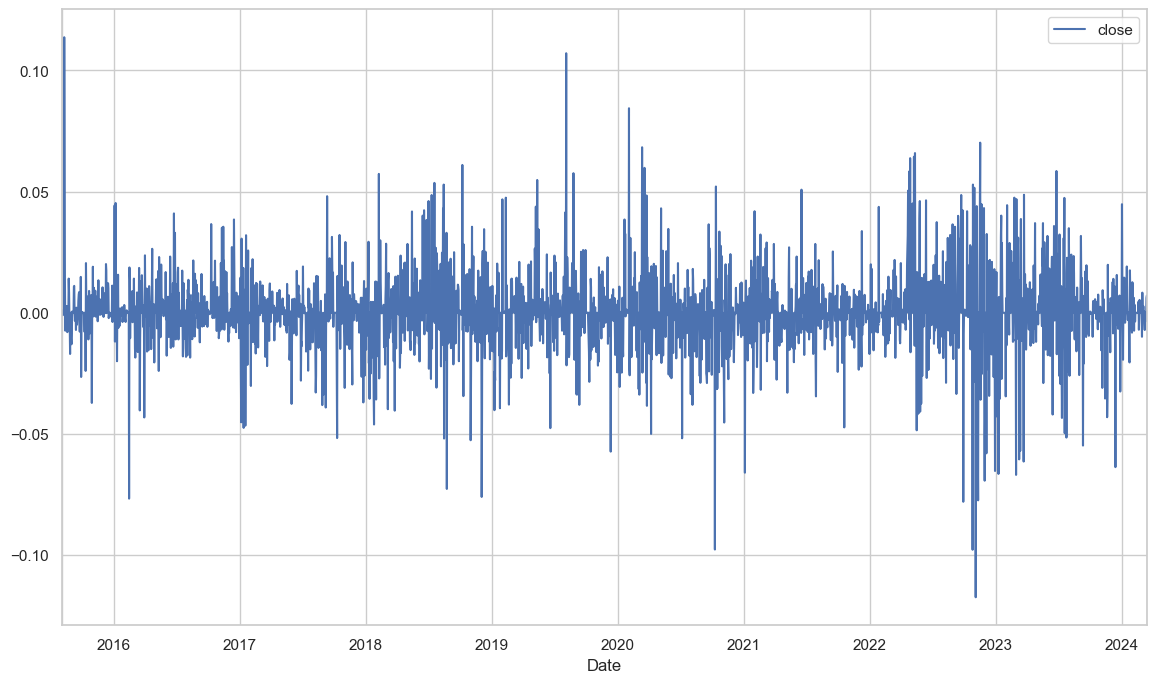

In [89]:
usdcny_post2015_diff.plot()

In [90]:
check_stationarity(usdcny_post2015_diff)
# d value is 1

The series is stationary


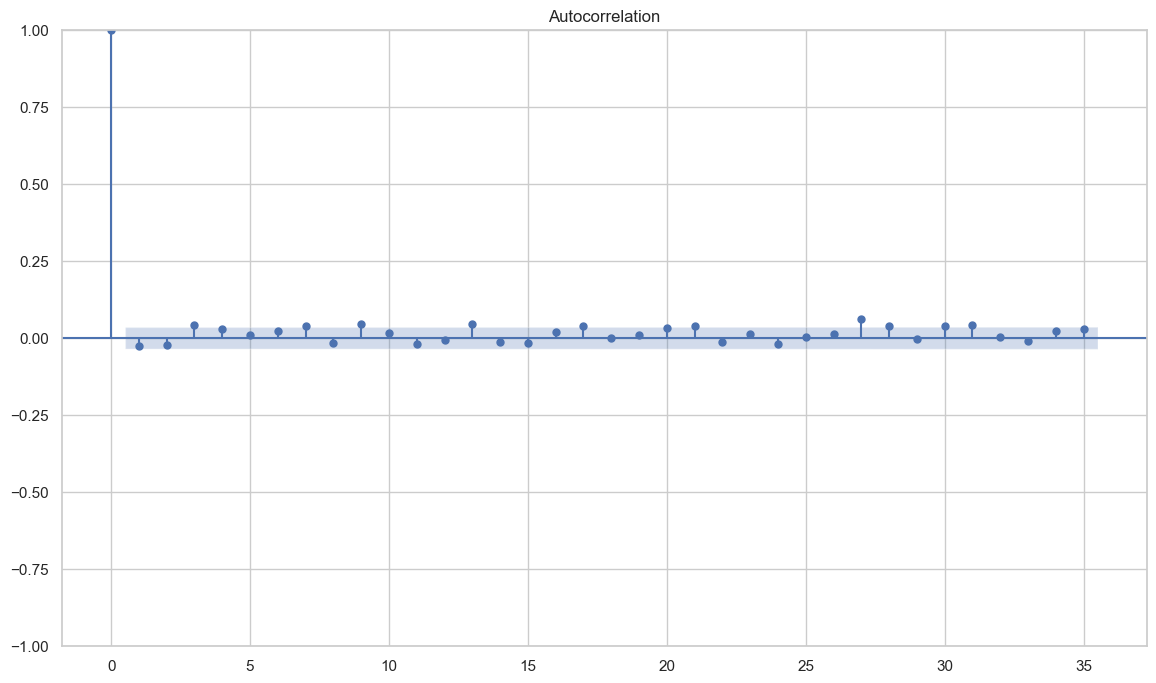

In [91]:
# Finding q
plot_acf(usdcny_post2015.diff().dropna());

# q is 1-1=0

In [92]:
# Need to assign a frequency to our date index so tha forecast will have associated dates
usdcny_post2015 = usdcny_post2015.asfreq('d', method='ffill')

In [131]:
# (p,d,q) = (2,1,2)
arima = ARIMA(usdcny_post2015,order=(2,1,0))
model_fit = arima.fit()

In [132]:
from pmdarima.arima import auto_arima

model = auto_arima(usdcny_post2015, start_p=1, start_q=1,
                      test='adf',
                      max_p=5, max_q=5,
                      m=1,             
                      d=1,          
                      seasonal=True,   
                      start_P=0, 
                      D=None, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-17428.190, Time=0.82 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-17431.518, Time=0.22 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-17431.663, Time=0.23 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-17431.760, Time=0.19 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-17432.176, Time=0.11 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 1.568 seconds


In [140]:
# new best model has values (p,d,q) = (0,1,0)
arima = ARIMA(usdcny_post2015,order=(2,1,0))
model_fit = arima.fit()

In [141]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  close   No. Observations:                 3147
Model:                 ARIMA(2, 1, 0)   Log Likelihood                8719.044
Date:                Mon, 25 Mar 2024   AIC                         -17432.089
Time:                        18:44:58   BIC                         -17413.927
Sample:                    08-03-2015   HQIC                        -17425.572
                         - 03-14-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0263      0.012     -2.165      0.030      -0.050      -0.002
ar.L2         -0.0242      0.017     -1.432      0.152      -0.057       0.009
sigma2         0.0002   2.58e-06     88.767      0.0

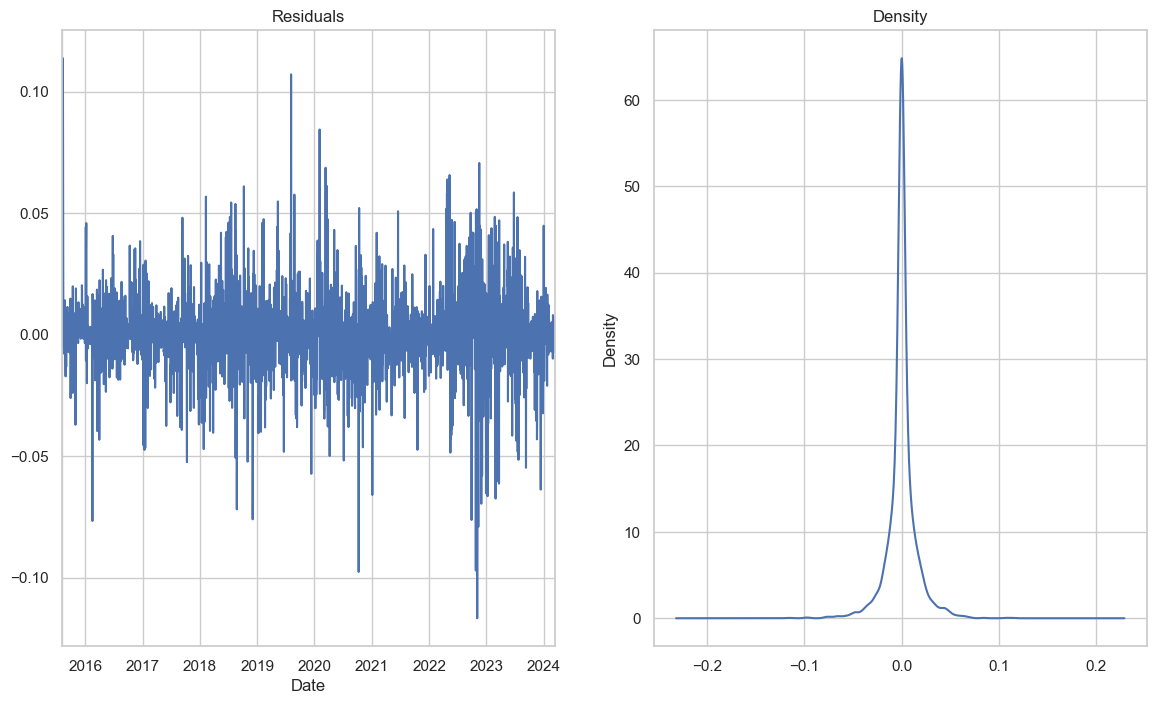

In [142]:
residuals = model_fit.resid[1:]
fig, ax = plt.subplots(1,2)
residuals.plot(title='Residuals', ax=ax[0])
residuals.plot(title='Density',kind='kde', ax=ax[1])
plt.show()

In [136]:
model_df = pd.DataFrame(model_fit.predict())

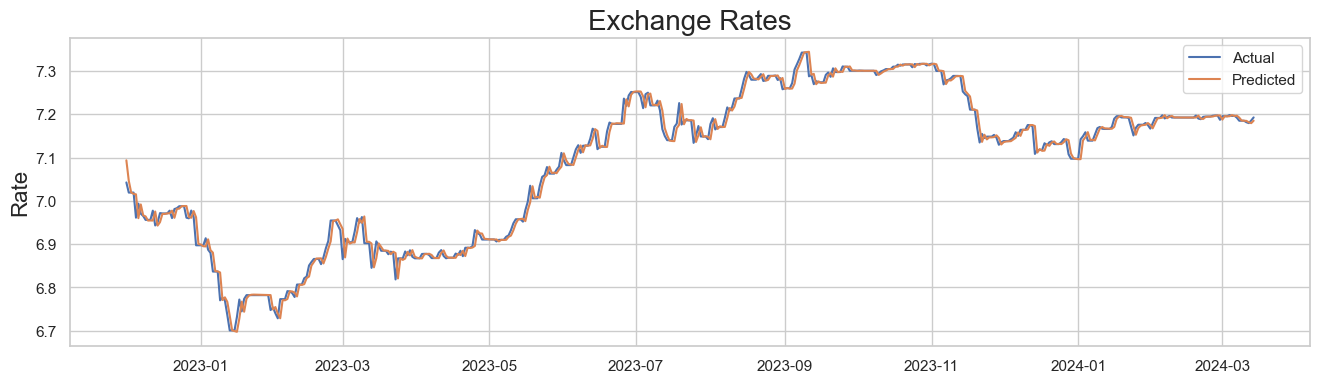

In [137]:
desired_start_date= '2022-12-01'
df_subset_model = model_df[model_df.index >= desired_start_date]
df_subset_actual = usdcny_post2015[usdcny_post2015.index >= desired_start_date]


plt.figure(figsize=(16,4))
plt.plot(df_subset_actual, label="Actual")
plt.plot(df_subset_model, label="Predicted")
plt.title('Exchange Rates', fontsize=20)
plt.ylabel('Rate', fontsize=16)
plt.legend()


plt.legend()

## SARIMA. Adding Seasonality to the ARIMA model for recurring patterns on days/weeks/motnhs/years. 

In [143]:
sarima = SARIMAX(usdcny_post2015,
                order=(2,1,0),
                seasonal_order=(1,1,0,12))
predictions = sarima.fit().predict()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.53581D+00    |proj g|=  1.12305D+01


 This problem is unconstrained.



At iterate    5    f= -2.55307D+00    |proj g|=  6.77371D-03

At iterate   10    f= -2.55307D+00    |proj g|=  6.71324D-02

At iterate   15    f= -2.55309D+00    |proj g|=  1.06660D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     17     23      1     0     0   1.835D-02  -2.553D+00
  F =  -2.5530927125133331     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


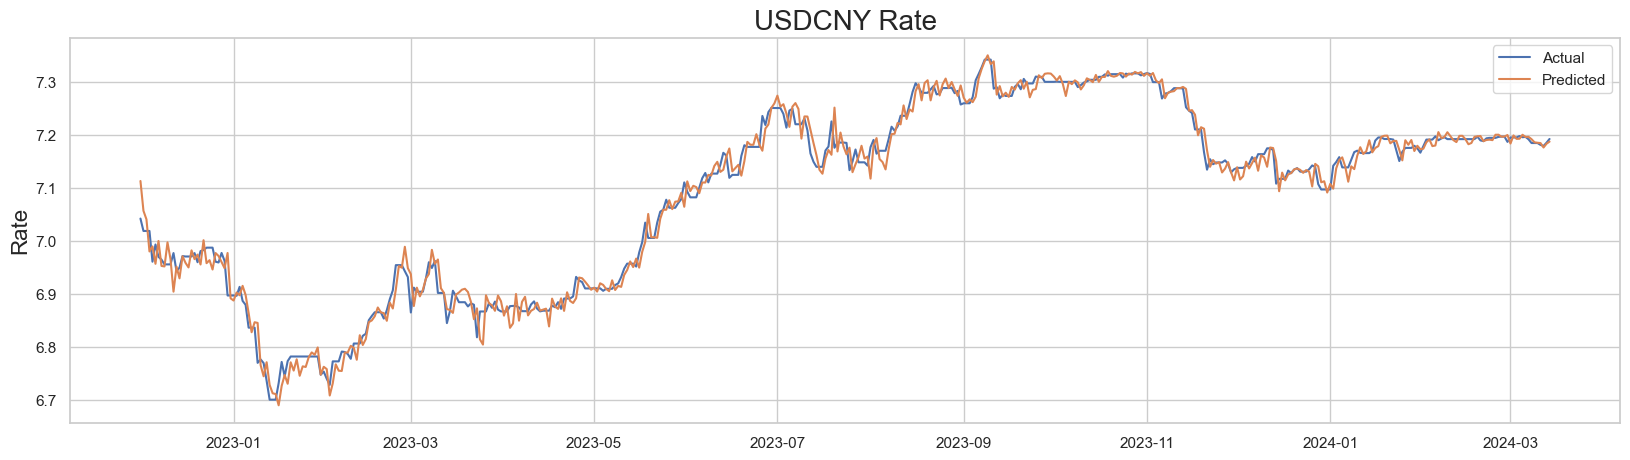

In [144]:
plt.figure(figsize=(20,5))
plt.plot(usdcny_post2015['2022-12-01':], label="Actual")
plt.plot(predictions['2022-12-01':], label="Predicted")
plt.title('USDCNY Rate', fontsize=20)
plt.ylabel('Rate', fontsize=16)
plt.legend()